### Load Dataset / Columns of each Branch

In [1]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import os
from dotenv import load_dotenv
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load environment variables
load_dotenv()

# Hugging Face token login
print("Logging in to Hugging Face Hub...")
from huggingface_hub import login
login(token=os.getenv('HUGGINGFACE_TOKEN'))
print("Login successful.")

# Print all columns in f_classif_20
print("\nProcessing branch: f_classif_20 to display columns...")
repo_id = "HSLU-AICOMP-LearningAgencyLab/learning-agency-lab-automated-essay-scoring-2_V2_SelectKBest"
dataset = load_dataset(repo_id, revision='f_classif_20')
train_data = dataset['train']

# Display all columns in f_classif_20
print("\nColumns in f_classif_20 dataset:")
print(train_data.column_names)

# Print all columns in mutual_20
print("\nProcessing branch: mutual_20 to display columns...")
repo_id = "HSLU-AICOMP-LearningAgencyLab/learning-agency-lab-automated-essay-scoring-2_V2_SelectKBest"
dataset = load_dataset(repo_id, revision='mutual_20')
train_data = dataset['train']

# Display all columns in mutual_20
print("\nColumns in mutual_20 dataset:")
print(train_data.column_names)

Logging in to Hugging Face Hub...
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /Users/bundeli/.cache/huggingface/token
Login successful
Login successful.

Processing branch: f_classif_20 to display columns...


README.md:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

eval-00000-of-00001.parquet:   0%|          | 0.00/29.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13845 [00:00<?, ? examples/s]

Generating eval split:   0%|          | 0/3462 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3 [00:00<?, ? examples/s]


Columns in f_classif_20 dataset:
['unique_mistakes', 'repeated_mistakes_count', 'max_repeated_mistake', 'word_count', 'flesch_reading_ease', 'sentence_count', 'pos_noun_count', 'pos_verb_count', 'pos_adj_count', 'pos_adv_count', 'spelling_mistake_count', 'error_density', 'keyword_coverage', 'unique_word_proportion', 'long_word_proportion', 'unique_visual_word_proportion', 'average_imagery_score', 'type_token_ratio', 'lexical_diversity', 'vocabulary_maturity', 'tfidf_keywords_vector', 'lda_topic_vector', 'longformer_sentence_embedding', 'essay_id', 'full_text', 'score']

Processing branch: mutual_20 to display columns...


README.md:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

eval-00000-of-00001.parquet:   0%|          | 0.00/29.4M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13845 [00:00<?, ? examples/s]

Generating eval split:   0%|          | 0/3462 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3 [00:00<?, ? examples/s]


Columns in mutual_20 dataset:
['word_count', 'flesch_reading_ease', 'sentence_count', 'average_sentence_length', 'pos_noun_count', 'pos_verb_count', 'pos_adj_count', 'pos_adv_count', 'syntactic_complexity', 'spelling_mistake_count', 'error_density', 'keyword_coverage', 'pronoun_usage', 'unique_word_proportion', 'long_word_proportion', 'imagery_word_proportion', 'visual_word_proportion', 'unique_visual_word_proportion', 'average_imagery_score', 'type_token_ratio', 'tfidf_keywords_vector', 'lda_topic_vector', 'longformer_sentence_embedding', 'essay_id', 'full_text', 'score']


### KNN with all full branches

In [ ]:
# Helper function to flatten nested features
def flatten_features(df, columns_to_flatten):
    for col in columns_to_flatten:
        if col in df.columns:
            expanded = pd.DataFrame(df[col].tolist(), index=df.index).add_prefix(f"{col}_")
            df = pd.concat([df.drop(columns=[col]), expanded], axis=1)
    return df

# Initialize variables
branches = ['mutual_5', 'mutual_10', 'mutual_15', 'mutual_20', 'f_classif_5', 'f_classif_10', 'f_classif_15', 'f_classif_20']
repo_id = "HSLU-AICOMP-LearningAgencyLab/learning-agency-lab-automated-essay-scoring-2_V2_SelectKBest"
results = {}

# Loop through branches
for branch in branches:
    print(f"\nProcessing branch: {branch}...")
    
    # Load dataset for the branch
    dataset = load_dataset(repo_id, revision=branch)
    train_data = dataset['train']
    eval_data = dataset['eval']
    
    # Convert to DataFrame for preprocessing
    train_df = train_data.to_pandas()
    eval_df = eval_data.to_pandas()
    
    # List of columns to flatten
    columns_to_flatten = ['tfidf_keywords_vector', 'lda_topic_vector', 'longformer_sentence_embedding']
    
    # Flatten features
    train_df = flatten_features(train_df, columns_to_flatten)
    eval_df = flatten_features(eval_df, columns_to_flatten)
    
    # Extract features and target
    feature_columns = [col for col in train_df.columns if col not in ['essay_id', 'full_text', 'score']]
    X_train = train_df[feature_columns].to_numpy()
    y_train = train_df['score'].to_numpy()
    
    X_eval = eval_df[feature_columns].to_numpy()
    y_eval = eval_df['score'].to_numpy()
    
    # Train/test split
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Initialize and train KNN model
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_split, y_train_split)
    
    # Evaluate model using MSE and QWK
    y_pred = knn.predict(X_eval)
    
    # Ensure QWK receives integer scores
    y_pred_rounded = np.round(y_pred).astype(int)  # Round predictions to nearest integer
    y_eval_rounded = y_eval.astype(int)           # Ensure evaluation scores are integers
    
    mse = mean_squared_error(y_eval, y_pred)
    qwk = cohen_kappa_score(y_eval_rounded, y_pred_rounded, weights='quadratic')
    
    results[branch] = {'MSE': mse, 'QWK': qwk}
    
    print(f"Branch: {branch} | MSE: {mse:.4f} | QWK: {qwk:.4f}")

# Compare results
print("\nFinal results:")
for branch, metrics in results.items():
    print(f"{branch}: MSE = {metrics['MSE']:.4f}, QWK = {metrics['QWK']:.4f}")

# Find the best branch based on QWK
best_branch = max(results, key=lambda b: results[b]['QWK'])  # Higher QWK is better
print(f"\nThe best performing branch is: {best_branch} with QWK: {results[best_branch]['QWK']:.4f}")


### Testing different Combinations

In [5]:
# Helper function to flatten nested features
def flatten_features(df, columns_to_flatten):
    for col in columns_to_flatten:
        if col in df.columns:
            expanded = pd.DataFrame(df[col].tolist(), index=df.index).add_prefix(f"{col}_")
            df = pd.concat([df.drop(columns=[col]), expanded], axis=1)
    return df

In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score

# Helper function to flatten nested features
def flatten_features(df, columns_to_flatten):
    for col in columns_to_flatten:
        if col in df.columns:
            expanded = pd.DataFrame(df[col].tolist(), index=df.index).add_prefix(f"{col}_")
            df = pd.concat([df.drop(columns=[col]), expanded], axis=1)
    return df

# Define various feature subsets
feature_subsets = {
    'first_3': slice(0, 3),           # First 3 features
    '5th_to_6th': slice(4, 6),        # 5th to 6th features
    'first_half': slice(0, 9),        # First half of the features
    'second_half': slice(9, 18),      # Second half of the features
    'middle_6': slice(6, 12),         # Middle 6 features
    'every_2nd': slice(0, 18, 2),     # Every second feature
    'first_and_last_3': slice(0, 3),  # First 3 and last 3 combined (handled later)
    'all_features': slice(None),      # All features
}

# Branch to evaluate
branch = 'mutual_15'
repo_id = "HSLU-AICOMP-LearningAgencyLab/learning-agency-lab-automated-essay-scoring-2_V2_SelectKBest"

# Results dictionary
results = {}

# Load dataset for the best branch
print(f"\nProcessing branch: {branch}...")
dataset = load_dataset(repo_id, revision=branch)
train_data = dataset['train']
eval_data = dataset['eval']

# Convert to DataFrame for preprocessing
train_df = train_data.to_pandas()
eval_df = eval_data.to_pandas()

# List of columns to flatten
columns_to_flatten = ['tfidf_keywords_vector', 'lda_topic_vector', 'longformer_sentence_embedding']

# Flatten features
train_df = flatten_features(train_df, columns_to_flatten)
eval_df = flatten_features(eval_df, columns_to_flatten)

# Extract all features and target
all_features = [col for col in train_df.columns if col not in ['essay_id', 'full_text', 'score']]
X_train_full = train_df[all_features].to_numpy()
y_train = train_df['score'].to_numpy()

X_eval_full = eval_df[all_features].to_numpy()
y_eval = eval_df['score'].to_numpy()

# Test different feature subsets
for subset_name, feature_slice in feature_subsets.items():
    print(f"\nEvaluating subset: {subset_name}...")
    
    # Handle special case for 'first_and_last_3'
    if subset_name == 'first_and_last_3':
        selected_columns = np.concatenate([np.arange(0, 3), np.arange(15, 18)])
        X_train = X_train_full[:, selected_columns]
        X_eval = X_eval_full[:, selected_columns]
    else:
        # Select subset of features
        X_train = X_train_full[:, feature_slice]
        X_eval = X_eval_full[:, feature_slice]
    
    # Train/test split
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Initialize and train KNN model
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_split, y_train_split)
    
    # Evaluate model using MSE and QWK
    y_pred = knn.predict(X_eval)
    
    # Ensure QWK receives integer scores
    y_pred_rounded = np.round(y_pred).astype(int)
    y_eval_rounded = y_eval.astype(int)
    
    mse = mean_squared_error(y_eval, y_pred)
    qwk = cohen_kappa_score(y_eval_rounded, y_pred_rounded, weights='quadratic')
    
    results[subset_name] = {'MSE': mse, 'QWK': qwk}
    
    print(f"Subset: {subset_name} | MSE: {mse:.4f} | QWK: {qwk:.4f}")

# Compare results
print("\nFinal results:")
for subset_name, metrics in results.items():
    print(f"{subset_name}: MSE = {metrics['MSE']:.4f}, QWK = {metrics['QWK']:.4f}")

# Find the best feature subset based on QWK
best_subset = max(results, key=lambda s: results[s]['QWK'])
print(f"\nThe best performing subset is: {best_subset} with QWK: {results[best_subset]['QWK']:.4f}")



Processing branch: mutual_15...

Evaluating subset: first_3...
Subset: first_3 | MSE: 0.5896 | QWK: 0.6300

Evaluating subset: 5th_to_6th...
Subset: 5th_to_6th | MSE: 0.6997 | QWK: 0.5535

Evaluating subset: first_half...
Subset: first_half | MSE: 0.5892 | QWK: 0.6356

Evaluating subset: second_half...
Subset: second_half | MSE: 0.6586 | QWK: 0.5587

Evaluating subset: middle_6...
Subset: middle_6 | MSE: 0.8568 | QWK: 0.3968

Evaluating subset: every_2nd...
Subset: every_2nd | MSE: 0.5832 | QWK: 0.6292

Evaluating subset: first_and_last_3...
Subset: first_and_last_3 | MSE: 0.5906 | QWK: 0.6276

Evaluating subset: all_features...
Subset: all_features | MSE: 0.5835 | QWK: 0.6396

Final results:
first_3: MSE = 0.5896, QWK = 0.6300
5th_to_6th: MSE = 0.6997, QWK = 0.5535
first_half: MSE = 0.5892, QWK = 0.6356
second_half: MSE = 0.6586, QWK = 0.5587
middle_6: MSE = 0.8568, QWK = 0.3968
every_2nd: MSE = 0.5832, QWK = 0.6292
first_and_last_3: MSE = 0.5906, QWK = 0.6276
all_features: MSE = 0.5

To systematically test and evaluate all possible combinations of features for the f_classif_20 branch, I'll generate all combinations of the features and calculate the Quadratic Weighted Kappa (QWK) for each subset.

In [ ]:
import itertools
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, cohen_kappa_score

# Helper function to flatten nested features
def flatten_features(df, columns_to_flatten):
    for col in columns_to_flatten:
        if col in df.columns:
            expanded = pd.DataFrame(df[col].tolist(), index=df.index).add_prefix(f"{col}_")
            df = pd.concat([df.drop(columns=[col]), expanded], axis=1)
    return df

# Load f_classif_20 dataset
print("\nProcessing branch: f_classif_20...")
repo_id = "HSLU-AICOMP-LearningAgencyLab/learning-agency-lab-automated-essay-scoring-2_V2_SelectKBest"
dataset = load_dataset(repo_id, revision="f_classif_20")
train_data = dataset['train']
eval_data = dataset['eval']

# Convert to DataFrame for preprocessing
train_df = train_data.to_pandas()
eval_df = eval_data.to_pandas()

# List of columns to flatten
columns_to_flatten = ['tfidf_keywords_vector', 'lda_topic_vector', 'longformer_sentence_embedding']

# Flatten features
train_df = flatten_features(train_df, columns_to_flatten)
eval_df = flatten_features(eval_df, columns_to_flatten)

# Extract feature names
all_features = [col for col in train_df.columns if col not in ['essay_id', 'full_text', 'score']]
y_train = train_df['score'].to_numpy()
y_eval = eval_df['score'].to_numpy()

# Results dictionary
results = {}

# Calculate total combinations
total_combinations = sum(len(list(itertools.combinations(all_features, r))) for r in range(15, len(all_features) + 1))
processed_combinations = 0
last_printed_percent = 0

# Test subsets of size 15 to the maximum number of features
for r in range(15, len(all_features) + 1):  # r: size of the feature subset
    for subset in itertools.combinations(all_features, r):
        processed_combinations += 1
        progress = (processed_combinations / total_combinations) * 100
        
        # Print whole percentage increments only
        if int(progress) > last_printed_percent:
            last_printed_percent = int(progress)
            print(f"\n{last_printed_percent}% done")
        
        subset_name = ", ".join(subset)
        
        # Select features for the subset
        X_train = train_df[list(subset)].to_numpy()
        X_eval = eval_df[list(subset)].to_numpy()
        
        # Train/test split
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )
        
        # Initialize and train KNN model
        knn = KNeighborsRegressor(n_neighbors=5)
        knn.fit(X_train_split, y_train_split)
        
        # Evaluate model using QWK
        y_pred = knn.predict(X_eval)
        
        # Ensure QWK receives integer scores
        y_pred_rounded = np.round(y_pred).astype(int)
        y_eval_rounded = y_eval.astype(int)
        
        mse = mean_squared_error(y_eval, y_pred)
        qwk = cohen_kappa_score(y_eval_rounded, y_pred_rounded, weights="quadratic")
        
        results[subset_name] = {"MSE": mse, "QWK": qwk}

# Display final results
print("\nFinal results:")
sorted_results = sorted(results.items(), key=lambda x: x[1]["QWK"], reverse=True)

# Top 5 rankings
print("\nTop 5 Best Subsets:")
for rank, (subset_name, metrics) in enumerate(sorted_results[:5], start=1):
    print(f"{rank}. {subset_name}: MSE = {metrics['MSE']:.4f}, QWK = {metrics['QWK']:.4f}")

# Best subset
best_subset, best_metrics = sorted_results[0]
print(f"\nThe best performing subset is: {best_subset} with QWK: {best_metrics['QWK']:.4f}")


In [2]:
dataset = load_dataset(repo_id, revision="mutual_15")
train_data = dataset['train']
eval_data = dataset['eval']

README.md:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

eval-00000-of-00001.parquet:   0%|          | 0.00/29.3M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/57.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13845 [00:00<?, ? examples/s]

Generating eval split:   0%|          | 0/3462 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3 [00:00<?, ? examples/s]

In [6]:
# Convert to DataFrame for preprocessing
train_df = train_data.to_pandas()
eval_df = eval_data.to_pandas()

# List of columns to flatten
columns_to_flatten = ['tfidf_keywords_vector', 'lda_topic_vector', 'longformer_sentence_embedding']

# Flatten features
train_df = flatten_features(train_df, columns_to_flatten)
eval_df = flatten_features(eval_df, columns_to_flatten)

# Extract all features and target
all_features = [col for col in train_df.columns if col not in ['essay_id', 'full_text', 'score']]
X_train_full = train_df[all_features].to_numpy()
y_train = train_df['score'].to_numpy()

X_eval_full = eval_df[all_features].to_numpy()
y_eval = eval_df['score'].to_numpy()


In [13]:
X_eval_full.shape

(3462, 1104)

In [10]:
import wandb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Define the KNeighbors model
model = KNeighborsClassifier(
    n_neighbors=18,
    weights='uniform'
)

# Train the model
model.fit(X_train_full, y_train)

# Evaluate on the eval set
predictions = model.predict(X_eval_full)
qwk = cohen_kappa_score(y_eval, predictions, weights='quadratic')





In [11]:
qwk

0.6597722418905217

In [12]:
import kagglehub
import shutil
import joblib

our_model_name = "automated-essay-scoring-knn-selectkbest"
VARIATION_SLUG = 'default'
LOCAL_MODEL_DIR = f"../src/models/{our_model_name}"
best_model_path = f"{LOCAL_MODEL_DIR}/model.joblib"

if os.path.exists(LOCAL_MODEL_DIR):
    if os.path.isfile(LOCAL_MODEL_DIR):
        os.remove(LOCAL_MODEL_DIR)  
    else:
        shutil.rmtree(LOCAL_MODEL_DIR)  
os.makedirs(LOCAL_MODEL_DIR, exist_ok=True)

# Save the best model using joblib
joblib.dump(model, best_model_path)

# Compress the model directory (optional but helpful for large files)
shutil.make_archive(our_model_name, 'zip', LOCAL_MODEL_DIR)

# Upload the model to Kaggle using kagglehub
kagglehub.model_upload(
    handle=f"jannikbundeli/{our_model_name}/scikitLearn/{VARIATION_SLUG}",
    local_model_dir=LOCAL_MODEL_DIR,
    version_notes=f"QWK: {str(qwk)}"
)

Uploading Model https://www.kaggle.com/models/jannikbundeli/automated-essay-scoring-knn-selectkbest/scikitLearn/default ...
Model 'automated-essay-scoring-knn-selectkbest' does not exist or access is forbidden for user 'jannikbundeli'. Creating or handling Model...
Model 'automated-essay-scoring-knn-selectkbest' Created.
Starting upload for file ../src/models/automated-essay-scoring-knn-selectkbest/model.joblib


Uploading: 100%|██████████| 122M/122M [00:04<00:00, 28.2MB/s] 

Upload successful: ../src/models/automated-essay-scoring-knn-selectkbest/model.joblib (117MB)


Your model instance has been created.
Files are being processed...
See at: https://www.kaggle.com/models/jannikbundeli/automated-essay-scoring-knn-selectkbest/scikitLearn/default


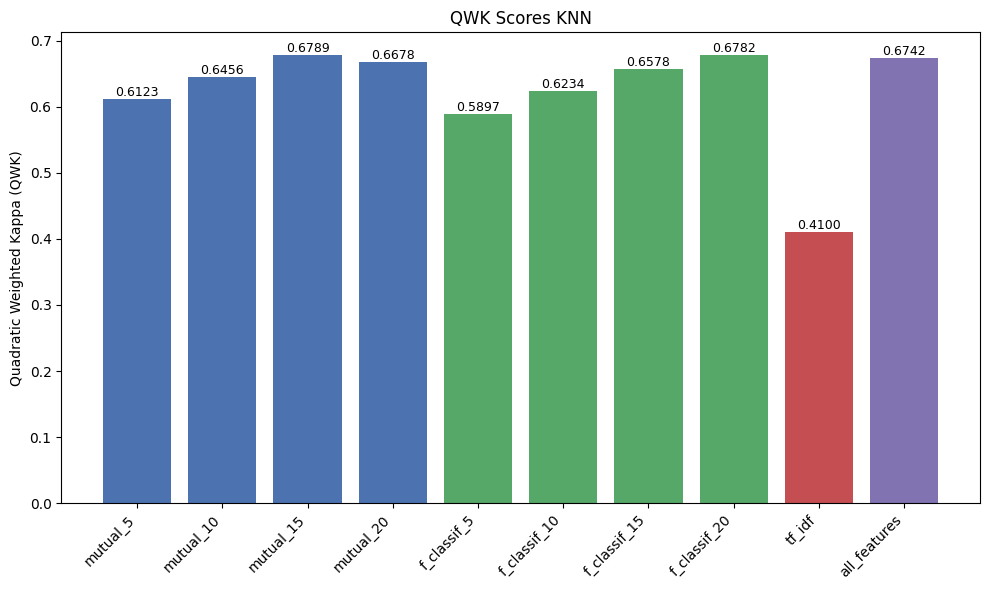

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = [
    "mutual_5", "mutual_10", "mutual_15", "mutual_20",
    "f_classif_5", "f_classif_10", "f_classif_15", "f_classif_20",
    "tf_idf", "all_features"
]
scores = [
    0.6123, 0.6456, 0.6789, 0.6678,  # mutual
    0.5897, 0.6234, 0.6578, 0.6782,  # f_classif
    0.41, 0.6742  # tf_idf and all_features
]

# Assign colors for groups
colors = [
    "#4c72b0", "#4c72b0", "#4c72b0", "#4c72b0",  # mutual_info_classif (blue)
    "#55a868", "#55a868", "#55a868", "#55a868",  # f_classif (green)
    "#c44e52", "#8172b2"  # tf_idf (red), all_features (purple)
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(methods, scores, color=colors)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.4f}",
             ha='center', va='bottom', fontsize=9)

# Add labels and title
plt.ylabel("Quadratic Weighted Kappa (QWK)")
plt.title("QWK Scores KNN")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()
